In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt
import fiona
import numpy as np 
import warnings
warnings.filterwarnings("ignore")
def read_gpkg(fnm,layer='perimeter'):
    ''' read gpkg data
    op: 'perimeter', 'fireline', 'newfirepix'
    '''

    gdf = gpd.read_file(fnm,layer=layer)

    return gdf

In [7]:
# Path to your GeoPackage file
gpkg_path = "Largefire/LargeFires_2020.gpkg"

# List all layers in the GeoPackage
layers = fiona.listlayers(gpkg_path)
print("Layers in GeoPackage:", layers)

# Inspect each layer
for layer in layers:
    gdf = gpd.read_file(gpkg_path, layer=layer)
    print(f"Structure of layer '{layer}':")
    print(gdf.dtypes)  # This prints the data types of each column
    print(gdf.head())  # This prints the first few rows for a quick look

Layers in GeoPackage: ['perimeter', 'fireline', 'newfirepix']
Structure of layer 'perimeter':
time             object
clat            float64
clon            float64
ftype             int64
n_pixels          int64
n_newpixels       int64
farea           float64
fperim          float64
flinelen        float64
duration        float64
pixden          float64
meanFRP         float64
year              int64
tst_month         int64
tst_day           int64
tst_ampm         object
ted_year          int64
ted_month         int64
ted_day           int64
ted_ampm         object
fireID            int64
geometry       geometry
dtype: object
                  time       clat        clon  ftype  n_pixels  n_newpixels  \
0  2020-08-01T00:00:00  33.991509 -116.935240      4        53           53   
1  2020-08-01T12:00:00  34.000390 -116.929311      4       103           50   
2  2020-08-02T00:00:00  34.031180 -116.863652      2       468          365   
3  2020-08-02T12:00:00  34.030323 -116.861985   

In [8]:
gdf_lf = read_gpkg(gpkg_path,layer='perimeter')
gdf_lf_FL = read_gpkg(gpkg_path,layer='fireline')
gdf_lf_NFP = read_gpkg(gpkg_path,layer='newfirepix')


In [45]:
# Specify the fireID you want to filter by
specific_fireID = 3649
  # Replace with the fireID you are interested in

# Filter rows that match the specific fireID
filtered_gdf = gdf_lf[gdf_lf['fireID'] == specific_fireID]

In [43]:
fireID_counts = gdf_lf['fireID'].value_counts()
print(fireID_counts)

fireID
3352    195
3649    158
3525    157
3756    125
3763    125
       ... 
3884      1
2762      1
4712      1
2691      1
102       1
Name: count, Length: 112, dtype: int64


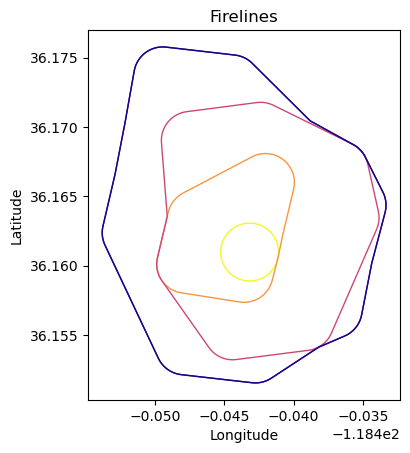

In [44]:
# newfirepix_gdf = gpd.read_file(gpkg_path, layer='newfirepix')

# Create a color map
num_rows = len(filtered_gdf)
colors = plt.cm.plasma(np.linspace(0, 1, num_rows))[::-1]

# Plot each row with a different color
fig, ax = plt.subplots()
for i,(idx, row )in enumerate(filtered_gdf.iterrows()):
    row_gdf = gpd.GeoDataFrame([row], columns=filtered_gdf.columns)
    row_gdf.plot(ax=ax,edgecolor=colors[i],facecolor='none',label=f'Fireline {i+1}')
    

# Setting the title and labels
ax.set_title('Firelines')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

In [54]:
gdf_lf['farea'].sort_values(ascending=False)

total = []
for x in gdf_lf['farea'].sort_values(ascending=False):
    total.append(x)
set(total)

{0.294106172202234,
 1.806307065788591,
 2.7412129794034286,
 3.9259640712480284,
 4.900013074007404,
 5.587976692119561,
 6.845439371188881,
 7.997680511289708,
 8.974335693955656,
 9.991213608900082,
 10.865971346597178,
 11.947405793995735,
 12.985780339631603,
 13.679119812218115,
 14.819707304763188,
 15.806126241956864,
 16.498509893236047,
 17.729322214659582,
 18.86604861410802,
 19.883740016670902,
 20.99962481291137,
 21.958636023702,
 22.892883446139827,
 23.969190296283593,
 24.986473109564624,
 25.92063458484438,
 26.439551609532376,
 27.320914996866087,
 28.989414880661013,
 29.99425251742404,
 30.569370833940503,
 31.010028753734346,
 32.477260358801374,
 33.90645238650555,
 34.76343600850099,
 35.87441716029857,
 36.43970622456293,
 37.99080659796728,
 38.891535586018755,
 39.991236445825166,
 40.90273344555122,
 41.7335354779675,
 42.71446660321122,
 41.673855712401505,
 44.83592425058184,
 45.893776169836954,
 46.96923745908296,
 47.46035231684251,
 48.87848698299108,